In [1]:
%pylab inline

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

df_adv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',
                    index_col=0)

X = df_adv[['TV', 'Radio']]
y = df_adv['Sales']
df_adv.head()

Populating the interactive namespace from numpy and matplotlib


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
## fit an OLS model with intercept on TV and radio
X= sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 26 Sep 2015   Prob (F-statistic):           4.83e-98
Time:                        12:37:19   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000         2.340     3.502
TV             0.0458      0.001     32.909      0.000         0.043     0.048
Radio          0.1880      0.008     23.382      0.000         0.172     0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
# You can also use the formulaix interface of statsmodels to compute
# regression with mutiple predictors. You just need to append
# the predictos to the formula via a '+' symbol.

# import formula api as alias smf
import statsmodels.formula.api as smf

# formula: response ~ predictor + predictor
est = smf.ols(formula='Sales ~ TV + Radio', data=df_adv).fit()

In [4]:
# Here is a sample data set investigating chronic heart disease
# It has non-quantititave variables

# import pandas as pd #already done

df = pd.read_csv('http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data', index_col=0)

# copy data and separate predictors and response
X = df.copy()
y = X.pop('chd')

df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [5]:
# The percent of chd for people with a famhist:
y.groupby(X.famhist).mean()

famhist
Absent     0.237037
Present    0.500000
Name: chd, dtype: float64

In [6]:
# encode df.famhist as a numeric via pd.Factor
df['famhist_ord'] = pd.Categorical(df.famhist).codes

est = smf.ols(formula='chd ~ famhist_ord', data=df).fit()

In [7]:
# Let's 'dummy enocode' famhist, which take a k-level categorical
# variable and encodes it into k-1 binary variables. We use the C() funct

from IPython.core.display import HTML
def short_summary(est):
    return HTML(est.summary().tables[1].as_html())

# fit OLS on categorical variables children and occupation
est = smf.ols(formula='chd ~ C(famhist)', data=df).fit()
short_summary(est)

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,0.2370,0.028,8.489,0.000,0.182 0.292
C(famhist)[T.Present],0.2630,0.043,6.071,0.000,0.178 0.348


In [8]:
## Interactions
# Now that categorical variables are out of the way,
# interaction terms are easier to explain

# We might be interested in studying the relationship between doctor visits
# (mdvis) and both log income and the binary var health status (hlthp)

df = pd.read_csv('https://raw.githubusercontent.com/statsmodels/statsmodels/master/statsmodels/datasets/randhie/src/randhie.csv')
df['logincome'] = np.log1p(df.income)

df[['mdvis', 'logincome', 'hlthp']].tail()

,mdvis,logincome,hlthp
20185,2,8.815268,0
20186,0,8.815268,0
20187,8,8.921870,0
20188,8,7.548329,0
20189,6,8.815268,0


,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,0.2725,0.227,1.200,0.230,-0.173 0.718
logincome,0.2916,0.026,11.310,0.000,0.241 0.342
hlthp,3.2778,0.261,12.566,0.000,2.767 3.789


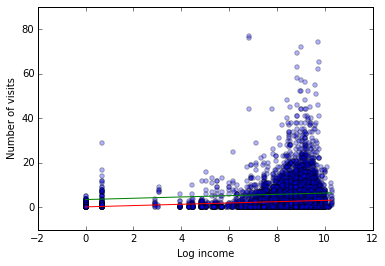

In [13]:
plt.scatter(df.logincome, df.mdvis, alpha=0.3)
plt.xlabel('Log income')
plt.ylabel('Number of visits')

income_linspace = np.linspace(df.logincome.min(), df.logincome.max(), 100)

est = smf.ols(formula='mdvis ~ logincome + hlthp', data=df).fit()

plt.plot(income_linspace, est.params[0] + est.params[1] * income_linspace + est.params[2] * 0, 'r')
plt.plot(income_linspace, est.params[0] + est.params[1] * income_linspace + est.params[2] * 1, 'g')

short_summary(est)

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,0.5217,0.234,2.231,0.026,0.063 0.980
hlthp,-0.4991,0.890,-0.561,0.575,-2.243 1.245
logincome,0.2630,0.027,9.902,0.000,0.211 0.315
hlthp:logincome,0.4868,0.110,4.441,0.000,0.272 0.702


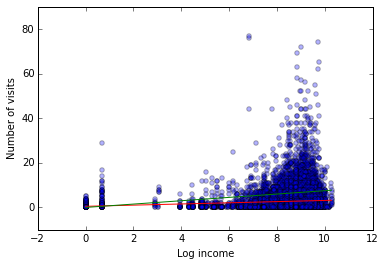

In [14]:
# We can include an interaction term to explore the effect of an interaction
# vetween the two -- i.e. we let the slope be different for the 
# two categories

plt.scatter(df.logincome, df.mdvis, alpha=0.3)
plt.xlabel('Log income')
plt.ylabel('Number of visits')

est = smf.ols(formula='mdvis ~ hlthp * logincome', data=df).fit()

plt.plot(income_linspace, est.params[0] + est.params[1] * 0 + est.params[2] * income_linspace + 
         est.params[3] * 0 * income_linspace, 'r')
plt.plot(income_linspace, est.params[0] + est.params[1] * 1 + est.params[2] * income_linspace + 
         est.params[3] * 1 * income_linspace, 'g')

short_summary(est)

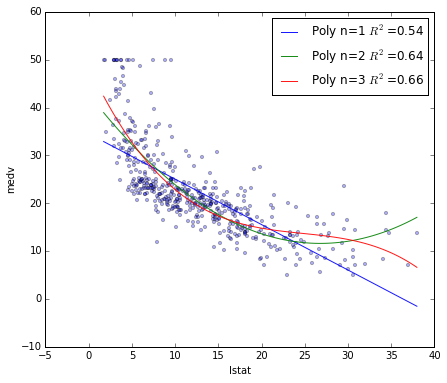

In [15]:
# The '*' int he formula means that we want the interaction term in addition
# each term separately (called main-effects). If you want to include
# just an interaction, use ':' instead. This is generally avoided in
# analysis because it is almost always the case that, if a variable is
# important due to interaction, it should have an effect by itself.

# W/o interactions, you have two lines, ones for hlthp = 1, one for 
# hlthp =0, with all having the same slope but different intercepts

# With including interactions, now each of the lines can have a
# different slope. This captures the effect that variation
# with income may be different for people who are in poor health
# than for people whoa re in better health.

# See docs of patsy, used by statsmodels to parse formula

## Polynomial Regression

#Despite it's name, linear regression can be used to fit non-linear functions
# A Linear regression model is linear in model parameters,
# Not necessarily the predictos. If oyu add non-linear transformations
# of your predictos to the linear regression model ,the model will
# be non-linear in the predictrs. 

# A very popular non-linear rewgression technique is Polynomial Regression
# a technique which models the relationship between the response
# and predictos as an n-th order polynomial. The higher the order of
# the polynomial the more 'wigglier' functions you can fit. Using higher 
# order polynomials comes at a price, however. First, the
# computational complexity of model fitting grows as number of
# adaptable parameters grows. Second, more complex model
# have a higher risk of overfitting. Overfitting means model
# loses ability to generalize for unseen examples.

# Let's use Boston housing dataset. We'll look into the task to predict
# house values in the Boston area using predictor lstat, which is 
# the 'proportion of adults w/o some hs education and proportion of 
# male workers classified as laborers.

# We can clearly see the relationship between medv and lstat is non-linear

# Load the dataset
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/MASS/Boston.csv')

# plot lstat (% lower status of the population) against median value
plt.figure(figsize=(6 *1.1618, 6))
plt.scatter(df.lstat, df.medv, s=10, alpha=0.3)
plt.xlabel('lstat')
plt.ylabel('medv')

# points linearly spaced on lstats
x = pd.DataFrame({'lstat': np.linspace(df.lstat.min(), df.lstat.max(), 100)})

# 1st order polynomial
poly_1 = smf.ols(formula='medv ~ 1 + lstat', data=df).fit()
plt.plot(x.lstat, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f'
         % poly_1.rsquared, alpha=0.9)

# 2nd order polynomial
poly_2 = smf.ols(formula='medv ~ 1 + lstat + I(lstat ** 2.0)', data=df).fit()
plt.plot(x.lstat, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f'
         % poly_2.rsquared, alpha=0.9)

#3rd order polynomial
poly_3 = smf.ols(formula='medv ~ 1 + lstat + I(lstat ** 2.0) + I(lstat ** 3.0)', data=df).fit()
plt.plot(x.lstat, poly_3.predict(x), 'r-', label='Poly n=3 $R^2$=%.2f'
         % poly_3.rsquared, alpha=0.9)

plt.legend()    
